In [22]:
#import bitdotio
import datetime
import dotenv
from getpass import getpass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyarrow
from pathlib import Path

In [5]:
neiss = pd.read_csv("../../r_neiss/neiss_data.csv", low_memory=False)
neiss.set_index("CPSC_Case_Number", inplace=True)
neiss.head()

,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,...,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative,Stratum,PSU,Weight
CPSC_Case_Number,,,,,,,,,,,,,,,,,,,,,
160101845,2016-01-01T00:00:00Z,92.0,Male,N.S.,NaN,NaN,LOWER TRUNK,FRACTURE,NaN,NaN,...,NO/?,DAY WEAR,FLOORS OR FLOORING MATERIALS,NaN,NaN,NaN,92YOM TRYINGO TO TAKE OFF PANTS AND LOST BALAN...,M,63,103.2251
160101847,2016-01-01T00:00:00Z,90.0,Male,N.S.,NaN,NaN,LOWER TRUNK,FRACTURE,NaN,NaN,...,NO/?,RECLINER CHAIR,NaN,NaN,NaN,NaN,90YOM FELL GETTING OUT OF A RECLINER CHAIR AND...,M,63,103.2251
160101848,2016-01-01T00:00:00Z,71.0,Female,N.S.,NaN,NaN,LOWER TRUNK,FRACTURE,NaN,NaN,...,NO/?,FLOORS OR FLOORING MATERIALS,NaN,NaN,NaN,NaN,71YOF SLIPPED AND FELL TO HER WET KITCHEN FLOO...,M,63,103.2251
160101852,2016-01-01T00:00:00Z,71.0,Female,N.S.,NaN,NaN,UPPER TRUNK,"STRAIN, SPRAIN",NaN,NaN,...,NO/?,"BAGS, NOT ELSEWHERE CLASSIFIED",NaN,NaN,NaN,NaN,71YOF CARRYING A 50 POUND BAG AND STRAINED CHE...,M,63,103.2251
160101857,2016-01-01T00:00:00Z,57.0,Male,N.S.,NaN,NaN,FOOT,LACERATION,NaN,NaN,...,NO/?,"KNIVES, NOT ELSEWHERE CLASSIFIED",NaN,NaN,NaN,NaN,57YOM DROPPED A KNIFE ONTO LEFT FOOT LACERATIO...,M,63,103.2251


In [6]:
neiss.columns

Index(['Treatment_Date', 'Age', 'Sex', 'Race', 'Other_Race', 'Hispanic',
       'Body_Part', 'Diagnosis', 'Other_Diagnosis', 'Body_Part_2',
       'Diagnosis_2', 'Other_Diagnosis_2', 'Disposition', 'Location',
       'Fire_Involvement', 'Product_1', 'Product_2', 'Product_3', 'Alcohol',
       'Drug', 'Narrative', 'Stratum', 'PSU', 'Weight'],
      dtype='object')

In [7]:
prod1_dummies = pd.get_dummies(neiss.Product_1, prefix="prod")
prod2_dummies = pd.get_dummies(neiss.Product_2, prefix="prod")
prod3_dummies = pd.get_dummies(neiss.Product_3, prefix="prod")
bp1_dummies = pd.get_dummies(neiss.Body_Part, prefix="bp")
bp2_dummies = pd.get_dummies(neiss.Body_Part_2, prefix="bp")
diag1_dummies = pd.get_dummies(neiss.Diagnosis, prefix="diag")
diag2_dummies = pd.get_dummies(neiss.Diagnosis_2, prefix="diag")

In [9]:
_ = prod1_dummies.add(prod2_dummies, axis=1, fill_value=0)
df_prod = _.add(prod3_dummies, axis=1, fill_value=0)
df_prod.set_index(neiss.index, inplace=True)
df_prod.head()

,prod_< 5 POISONINGS - NO OTHER CODE,prod_ABOVE-GROUND SWIMMING POOLS (EXCL PORTABLE POOLS),prod_ABRASIVE CLEANERS,prod_ACIDS,prod_ADHESIVES,prod_AEROSOL CONTAINERS,prod_AIR COMPRESSORS (SEPARATE),prod_AIR CONDITIONERS,prod_AIR PURIFIERS,prod_ALCOHOL (BEVERAGE),...,"prod_WOOD BURNING FIREPLACES, FACTORY BUILT",prod_WOOD PANELING AND PARTICLEBOARD,prod_WOODBURNING KITS,prod_WOODEN CONTAINERS,prod_WOODEN MATCHES,prod_WORKSHOP COMPOUNDS OR CHEMICALS,prod_WORKSHOP FURNISHINGS,"prod_WORKSHOP GRINDERS, BUFFERS OR POLISHERS, N.S.","prod_WRESTLING (ACTIVITY, APPAREL OR EQUIPMENT)",prod_WRINGER WASHING MACHINES
CPSC_Case_Number,,,,,,,,,,,,,,,,,,,,,
160101845,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0.0,0,0.0,0,0,0,0,0
160101847,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0.0,0,0.0,0,0,0,0,0
160101848,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0.0,0,0.0,0,0,0,0,0
160101852,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0.0,0,0.0,0,0,0,0,0
160101857,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0.0,0,0.0,0,0,0,0,0


In [10]:
df_bp = bp1_dummies.add(bp2_dummies, axis=1, fill_value=0)
df_bp.set_index(neiss.index, inplace=True)
df_bp.head()

,bp_25-50% OF BODY,bp_ALL PARTS BODY,bp_ANKLE,bp_EAR,bp_ELBOW,bp_EYEBALL,bp_FACE,bp_FINGER,bp_FOOT,bp_HAND,...,bp_MOUTH,bp_NECK,bp_NOT STATED/UNK,bp_PUBIC REGION,bp_SHOULDER,bp_TOE,bp_UPPER ARM,bp_UPPER LEG,bp_UPPER TRUNK,bp_WRIST
CPSC_Case_Number,,,,,,,,,,,,,,,,,,,,,
160101845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160101847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160101848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160101852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
160101857,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_diag = diag1_dummies.add(diag2_dummies, axis=1, fill_value=0)
df_diag.set_index(neiss.index, inplace=True)
df_diag.head()

,diag_AMPUTATION,diag_ANOXIA,diag_ASPIRATION,diag_AVULSION,"diag_BURN, CHEMICAL","diag_BURN, ELECTRICAL","diag_BURN, NOT SPEC.","diag_BURN, SCALD","diag_BURNS, THERMAL",diag_CONCUSSION,...,diag_INGESTION,diag_INTERNAL INJURY,diag_LACERATION,diag_NERVE DAMAGE,diag_OTHER,diag_POISONING,diag_PUNCTURE,diag_RADIATION,"diag_STRAIN, SPRAIN",diag_SUBMERSION
CPSC_Case_Number,,,,,,,,,,,,,,,,,,,,,
160101845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160101847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160101848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160101852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
160101857,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
sub = neiss.iloc[:, [0, -1]]
analysis = pd.concat([sub, df_prod, df_bp, df_diag], axis=1)
del([neiss, sub])

In [19]:
weighted_incidents = analysis.iloc[:,2:].values * np.expand_dims(analysis.iloc[:,1].values,1)
df_wt = pd.DataFrame(weighted_incidents, index = analysis.index, columns=analysis.iloc[:,2:].columns)
df_out = pd.concat([analysis.iloc[:,0:2], df_wt], axis=1)
df_out['date'] = pd.to_datetime(df_out['Treatment_Date'],format='%Y-%m-%d')
df_out['year'] = pd.DatetimeIndex(df_out['date']).year
df_out['month'] = pd.DatetimeIndex(df_out['date']).month
df_out['doy'] = pd.DatetimeIndex(df_out['date']).dayofyear
df_out.head()

,Treatment_Date,Weight,prod_< 5 POISONINGS - NO OTHER CODE,prod_ABOVE-GROUND SWIMMING POOLS (EXCL PORTABLE POOLS),prod_ABRASIVE CLEANERS,prod_ACIDS,prod_ADHESIVES,prod_AEROSOL CONTAINERS,prod_AIR COMPRESSORS (SEPARATE),prod_AIR CONDITIONERS,...,diag_OTHER,diag_POISONING,diag_PUNCTURE,diag_RADIATION,"diag_STRAIN, SPRAIN",diag_SUBMERSION,date,year,month,doy
CPSC_Case_Number,,,,,,,,,,,,,,,,,,,,,
160101845,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,2016-01-01 00:00:00+00:00,2016,1,1
160101847,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,2016-01-01 00:00:00+00:00,2016,1,1
160101848,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,2016-01-01 00:00:00+00:00,2016,1,1
160101852,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,103.2251,0.0,2016-01-01 00:00:00+00:00,2016,1,1
160101857,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,2016-01-01 00:00:00+00:00,2016,1,1


In [25]:
if not Path("../data/").exists():
    Path("../data/").mkdir()
    
df_out.to_parquet("../data/outlier_df.parquet")

# Begin Here after Preprocessing

In [276]:
import datetime
import dotenv
from getpass import getpass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyarrow
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from pathlib import Path

In [277]:
df = pd.read_parquet("../data/outlier_df.parquet")
df.head()

,Treatment_Date,Weight,prod_< 5 POISONINGS - NO OTHER CODE,prod_ABOVE-GROUND SWIMMING POOLS (EXCL PORTABLE POOLS),prod_ABRASIVE CLEANERS,prod_ACIDS,prod_ADHESIVES,prod_AEROSOL CONTAINERS,prod_AIR COMPRESSORS (SEPARATE),prod_AIR CONDITIONERS,...,diag_OTHER,diag_POISONING,diag_PUNCTURE,diag_RADIATION,"diag_STRAIN, SPRAIN",diag_SUBMERSION,date,year,month,doy
CPSC_Case_Number,,,,,,,,,,,,,,,,,,,,,
160101845,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,2016-01-01 00:00:00+00:00,2016,1,1
160101847,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,2016-01-01 00:00:00+00:00,2016,1,1
160101848,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,2016-01-01 00:00:00+00:00,2016,1,1
160101852,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,103.2251,0.0,2016-01-01 00:00:00+00:00,2016,1,1
160101857,2016-01-01T00:00:00Z,103.2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,2016-01-01 00:00:00+00:00,2016,1,1


# Analysis by Date

In [279]:
df['day'] = pd.DatetimeIndex(df['date']).day
byday = df.drop(["Weight", "Treatment_Date", "doy", "date"], axis=1)
byday.head()

,prod_< 5 POISONINGS - NO OTHER CODE,prod_ABOVE-GROUND SWIMMING POOLS (EXCL PORTABLE POOLS),prod_ABRASIVE CLEANERS,prod_ACIDS,prod_ADHESIVES,prod_AEROSOL CONTAINERS,prod_AIR COMPRESSORS (SEPARATE),prod_AIR CONDITIONERS,prod_AIR PURIFIERS,prod_ALCOHOL (BEVERAGE),...,diag_NERVE DAMAGE,diag_OTHER,diag_POISONING,diag_PUNCTURE,diag_RADIATION,"diag_STRAIN, SPRAIN",diag_SUBMERSION,year,month,day
CPSC_Case_Number,,,,,,,,,,,,,,,,,,,,,
160101845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,2016,1,1
160101847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,2016,1,1
160101848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,2016,1,1
160101852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,103.2251,0.0,2016,1,1
160101857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,2016,1,1


## Group by day of year and take the mean

In [291]:
byday_grouped = byday.groupby(['year','month','day']).agg('sum')
byday_grouped = byday_grouped.groupby(['month', 'day']).agg('mean')
byday_grouped.head()

prod_< 5 POISONINGS - NO OTHER CODE  \
month day                                        
1     1                                0.00000   
      2                                0.00000   
      3                                0.90112   
      4                                0.00000   
      5                                0.00000   

           prod_ABOVE-GROUND SWIMMING POOLS (EXCL PORTABLE POOLS)  \
month day                                                           
1     1                                              0.00000        
      2                                              0.00000        
      3                                              0.00000        
      4                                              3.23656        
      5                                              0.00000        

           prod_ABRASIVE CLEANERS  prod_ACIDS  prod_ADHESIVES  \
month day                                                       
1     1                       0.0     0.00000        16.76080   
      2                       0.0     0.00000         4.63148   
      3                       0.0     0.00000        39.25024   
      4                       0.0     0.00000        17.86244   
      5                       0.0    23.88158        24.23918   

           prod_AEROSOL CONTAINERS  prod_AIR COMPRESSORS (SEPARATE)  \
month day                                                             
1     1                    0.97020                          0.00000   
      2                    0.00000                         10.99778   
      3                   10.99778                          0.00000   
      4                   14.19406                          0.00000   
      5                    0.00000                          3.50272   

           prod_AIR CONDITIONERS  prod_AIR PURIFIERS  prod_ALCOHOL (BEVERAGE)  \
month day                                                                       
1     1                  0.00000                 0.0                   0.0000   
      2                 17.39390                 0.0                   0.0000   
      3                  4.13768                 0.0                   0.0000   
      4                 13.42062                 0.0                   1.1036   
      5                 35.85752                 0.0                   0.0000   

           ...  diag_INGESTION  diag_INTERNAL INJURY  diag_LACERATION  \
month day  ...                                                          
1     1    ...       156.00392            4145.50758       8170.76086   
      2    ...       336.57460            3908.53152       6376.87300   
      3    ...       276.67538            4061.43672       5550.14416   
      4    ...       298.35456            3360.38440       5611.63084   
      5    ...        78.31034            3905.17312       6151.26782   

           diag_NERVE DAMAGE  diag_OTHER  diag_POISONING  diag_PUNCTURE  \
month day                                                                 
1     1            218.44030  5944.00852       746.71642      306.79594   
      2            209.28580  6485.26412       280.20946      285.83602   
      3            247.27458  7059.97662       444.58094      177.92474   
      4            200.34094  6294.56082       425.11008      275.11466   
      5            299.62128  6531.61860       430.00670      188.02036   

           diag_RADIATION  diag_STRAIN, SPRAIN  diag_SUBMERSION  
month day                                                        
1     1          14.76010           4390.00092         13.42062  
      2           0.00000           4885.16298         14.88724  
      3          14.23434           4343.95870          0.00000  
      4          28.32922           4615.44440          0.00000  
      5          15.53282           4040.85068          1.12876  

[5 rows x 859 columns]

In [292]:
from sklearn.preprocessing import StandardScaler
clf = LocalOutlierFactor(n_neighbors=20) # Looking for about 10 days
X = byday_grouped.values
X.shape
X2 = StandardScaler().fit_transform(X)

In [293]:
y_pred = clf.fit_predict(X)
byday_grouped.index[y_pred==-1]

MultiIndex([( 1,  1),
            ( 7,  4),
            ( 7,  5),
            (12, 24),
            (12, 25)],
           names=['month', 'day'])

In [294]:
y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [295]:
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(X2)
pca.explained_variance_ratio_

array([0.06490035, 0.01973898])

In [389]:
pca.explained_variance_ratio_
comps = pca.components_
feats = byday_grouped.columns
comp_weights = list(zip(feats, comps[0,:], comps[1,:]))
comp_weights
wdf = pd.DataFrame(comp_weights, columns = ["feature", "first", "second"])
wdf.loc[(wdf['first'] > 0.115) | (wdf['second'] > 0.1)]
#scaler=5

#wdf.sort_values(["first", "second"])

,feature,first,second
83,"prod_BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN ...",0.124281,-0.016550
103,prod_BUILT-IN SWIMMING POOLS,0.095429,0.107261
278,"prod_FISHING (ACTIVITY, APPAREL OR EQUIPMENT)",0.115488,0.060298
412,"prod_LAWN MOWERS, NOT SPECIFIED",0.117633,-0.004440
693,"prod_SWIMMING (ACTIVITY, APPAREL OR EQUIPMENT)",0.101724,0.110116
697,"prod_SWIMMING POOLS, NOT SPECIFIED",0.106806,0.107618
811,bp_FOOT,0.116820,0.004833


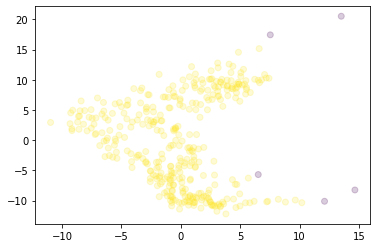

In [356]:
pc1, pc2= zip(*pca_vals)
plt.scatter(pc2,pc1, c=y_pred, alpha = 0.2)
plt.show()

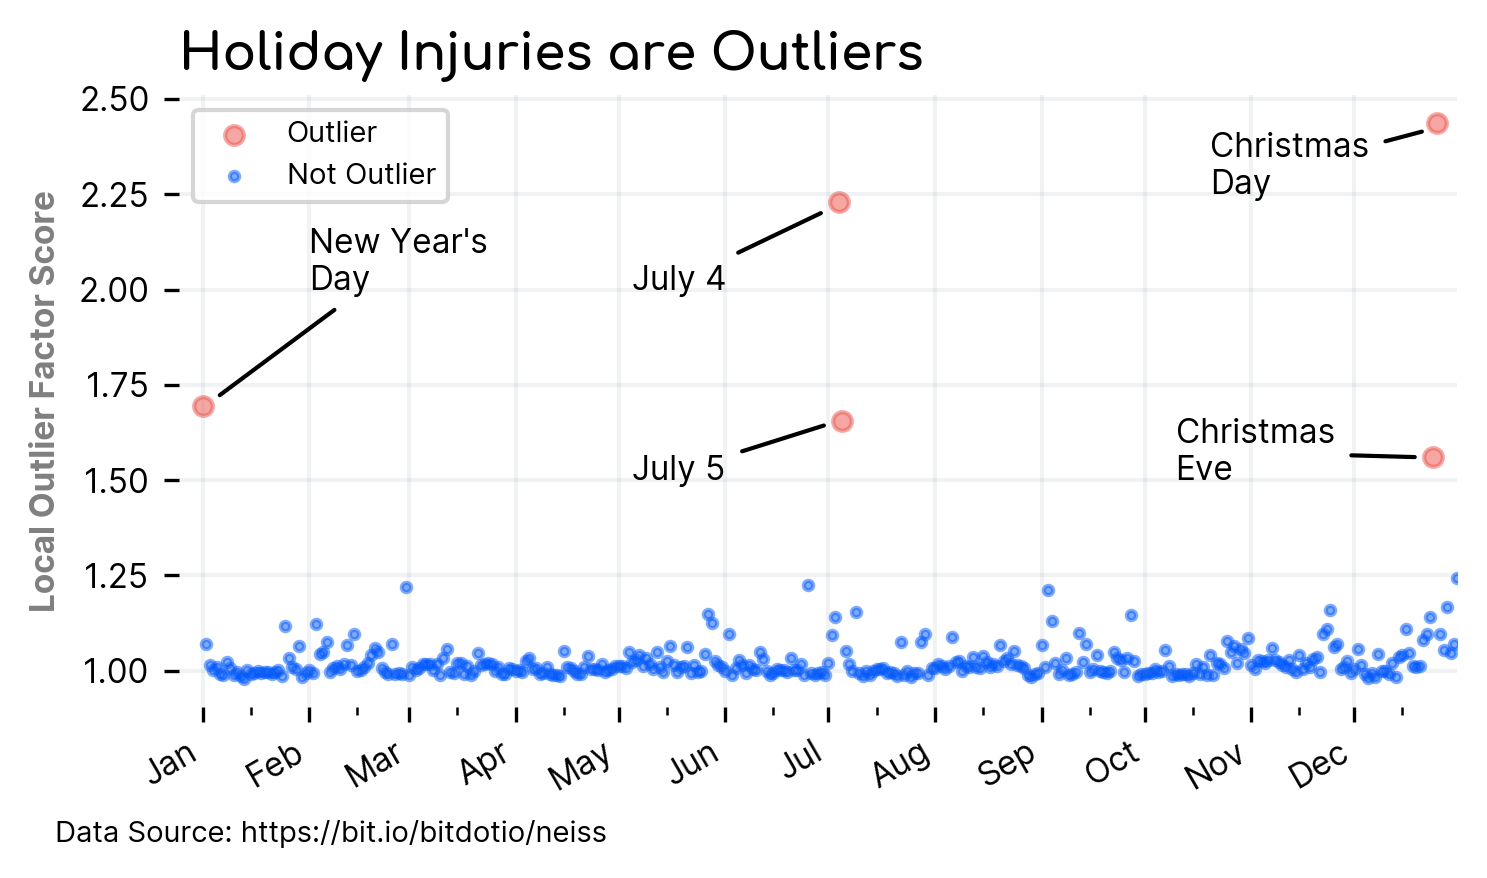

In [487]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

GREY = '#788995'
BLUE = '#0059ff'
GOLD = '#fdbd28'
GREEN = '#28D9AA'
RED = '#EE5149'
METAL_SUN = '#AD8D40'
DARK_ORCHID = '#9A34D1'
MAGENTA = '#8A4859'
OXFORD = '#121C3B'
PINK = '#DB9995'

colormap = np.array([RED, GOLD])
y_plot = y_pred
y_plot[y_pred==-1]=0


fig, ax = plt.subplots(figsize=(5.5,3), dpi=300)
dates = [datetime.date(2020, x, y) for x, y in byday_grouped.index.values]
scatter1 = ax.scatter(np.array(dates)[y_pred == 0], -1*clf.negative_outlier_factor_[y_pred == 0], c=RED,
                      alpha = 0.5, label="Outlier", s=20)
scatter2 = ax.scatter(np.array(dates)[y_pred == 1], -1*clf.negative_outlier_factor_[y_pred == 1], c=BLUE,
                      alpha = 0.5, label = "Not Outlier", s=5)
fmt_month = mdates.MonthLocator()
fmt_day = mdates.DayLocator(15)
ax.xaxis.set_major_locator(fmt_month)
ax.xaxis.set_minor_locator(fmt_day)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Legend
leg = plt.legend(loc="upper left", bbox_to_anchor=(0, 1), prop = {"family": "Inter", "size":7}, ncol=1,
                frameon=True)

#handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title=None)

# grid
ax.grid(b=True, color=GREY, alpha=0.1, linewidth=1)
ax.grid(b=True, axis="y", color=GREY, alpha=0.1, linewidth=1)
plt.xticks(fontfamily="Inter", size=8)
plt.yticks(fontfamily="Inter", size=8)

ax.annotate('July 4', (datetime.date(2020, 7, 1), 2.21),
            (datetime.date(2020, 5, 5), 2), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")
ax.annotate('July 5', (datetime.date(2020, 7, 2), 1.65),
            (datetime.date(2020, 5, 5), 1.5), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")
ax.annotate('Christmas\nDay', (datetime.date(2020, 12, 23), 2.42),
            (datetime.date(2020, 10, 20), 2.25), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")
ax.annotate("New Year's\nDay", (datetime.date(2020, 1, 4), 1.71),
            (datetime.date(2020, 2, 1), 2), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")
ax.annotate("Christmas\nEve", (datetime.date(2020, 12, 21), 1.56),
            (datetime.date(2020, 10, 10), 1.5), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax.set_xlim([datetime.date(2019, 12, 25), datetime.date(2020, 12, 31)])
#ax.set_xlabel("Month of Year", fontfamily="Roboto", color="black", alpha = 0.5, weight="bold")
ax.set_ylabel("Local Outlier Factor Score", fontfamily="Inter", color="black", alpha = 0.5, weight="bold", size=8)
ax.set_title("Holiday Injuries are Outliers", fontdict = {'fontfamily':"Comfortaa", "weight":"bold"}, loc="left")
fig.autofmt_xdate()
fig.subplots_adjust(bottom=0.2) # or whatever
fig.text(0.05, 0.05, "Data Source: https://bit.io/bitdotio/neiss", ha='left',
        fontdict={"family":"Inter", "size":7})
#fig.tight_layout()
fig.patch.set_facecolor('white')
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

#image = plt.imread("/Users/danielliden/Downloads/Union.png")
#ax2 = plt.axes([0.88,-0.03, 0.1, 0.1], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
#ax2.imshow(image)
#ax2.axis('off')
#ax2.annotate("@bitdotioinc", (4,-7), xycoords = "axes points", fontsize=6, fontfamily="Inter", weight="bold", color=GOLD)
#fig.text(0.1, 0.01, "Data Source: https://bit.io/bitdotio/neiss", ha='left',
#        fontdict={"family":"Inter", "size":7})


if not Path("../figures/").exists():
    Path("../figures/").mkdir()
plt.savefig("../figures/figure_1.png")

plt.show()

In [397]:
pc_df = pd.DataFrame({'x':pc2, 'y':pc1}, index=byday_grouped.index)

pca.explained_variance_ratio_
comps = pca.components_
feats = byday_grouped.columns
comp_weights = list(zip(feats, comps[0,:], comps[1,:]))
wdf = pd.DataFrame(comp_weights, columns = ["feature", "first", "second"])
wdf_sub = wdf.loc[(wdf['first'] > 0.115) | (wdf['second'] > 0.108)].reset_index(drop=True)
wdf_sub['names'] = ['Bicycles', 'Fishing', 'Lawn Mowers',
                    'Swimming', 'Foot (body part)']
wdf_sub

,feature,first,second,names
0,"prod_BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN ...",0.124281,-0.016550,Bicycles
1,"prod_FISHING (ACTIVITY, APPAREL OR EQUIPMENT)",0.115488,0.060298,Fishing
2,"prod_LAWN MOWERS, NOT SPECIFIED",0.117633,-0.004440,Lawn Mowers
3,"prod_SWIMMING (ACTIVITY, APPAREL OR EQUIPMENT)",0.101724,0.110116,Swimming
4,bp_FOOT,0.116820,0.004833,Foot (body part)


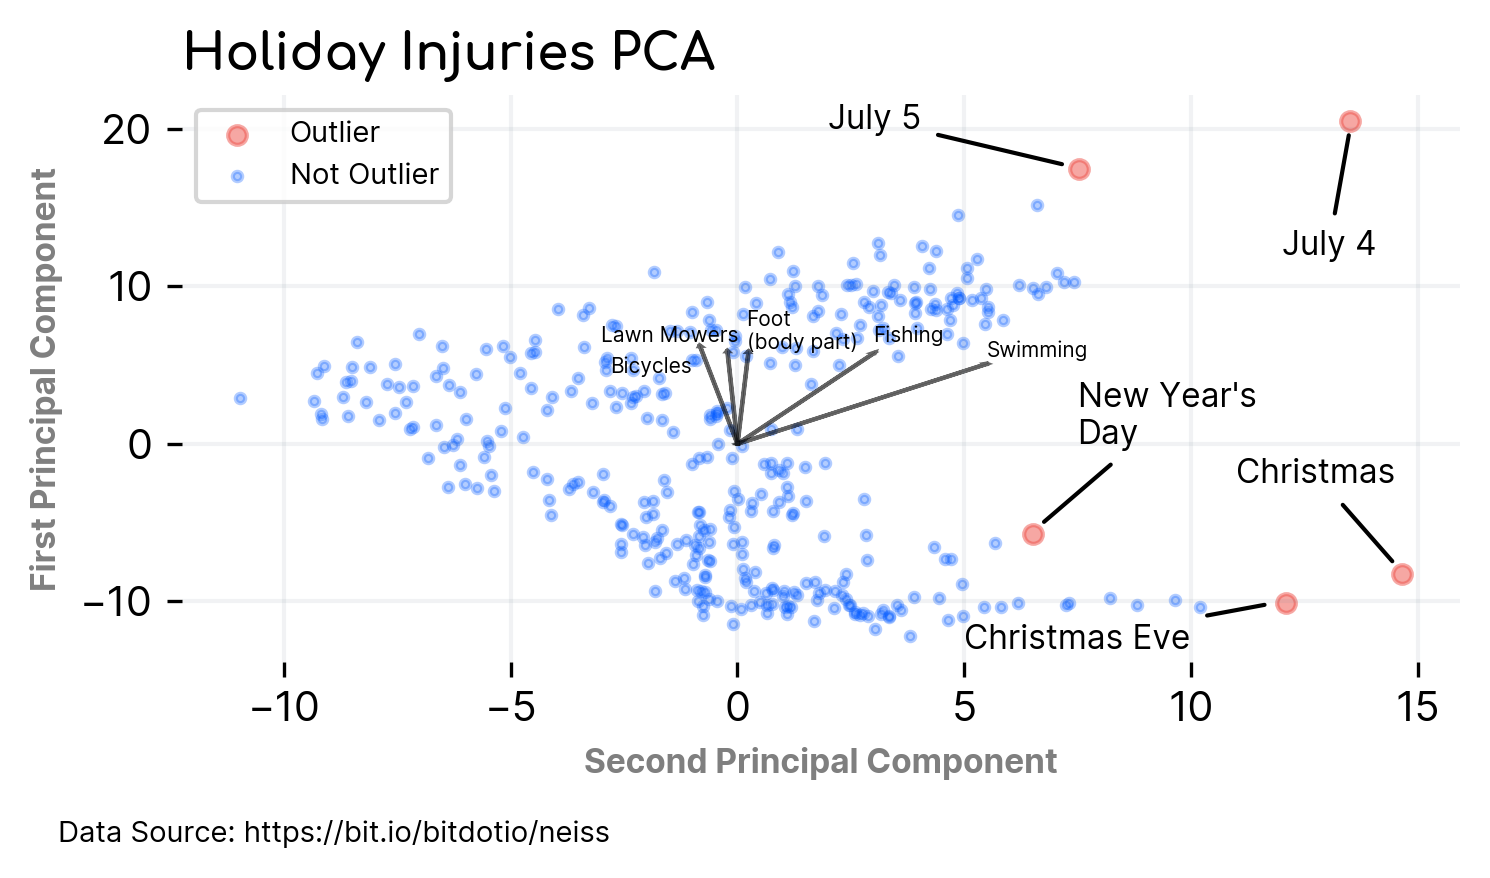

In [499]:

fig, ax = plt.subplots(figsize=(5.5,3), dpi=300)
dates = [datetime.date(2020, x, y) for x, y in byday_grouped.index.values]
scatter1 = ax.scatter(np.array(pc_df.x)[y_pred == 0], np.array(pc_df.y)[y_pred == 0], c=RED,
                      alpha = 0.5, label="Outlier", s=20)
scatter2 = ax.scatter(np.array(pc_df.x)[y_pred == 1], np.array(pc_df.y)[y_pred == 1], c=BLUE,
                      alpha = 0.3, label = "Not Outlier", s=5)


# Legend
leg = plt.legend(loc="upper left", bbox_to_anchor=(0,1), prop = {"family": "Inter", "size":7}, ncol=1,
                frameon=True)

#handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title=None)

# grid
ax.grid(b=True, color=GREY, alpha=0.1, linewidth=1)
ax.grid(b=True, axis="y", color=GREY, alpha=0.1, linewidth=1)
plt.xticks(fontfamily="Inter")
plt.yticks(fontfamily="Inter")

j4x = pc_df.loc[(pc_df.index==(7,4)),'x'].values
j4y = pc_df.loc[(pc_df.index==(7,4)),'y'].values

j5x = pc_df.loc[(pc_df.index==(7,5)),'x'].values
j5y = pc_df.loc[(pc_df.index==(7,5)),'y'].values

xmx = pc_df.loc[(pc_df.index==(12,25)),'x'].values
xmy = pc_df.loc[(pc_df.index==(12,25)),'y'].values

nyx = pc_df.loc[(pc_df.index==(1,1)),'x'].values
nyy = pc_df.loc[(pc_df.index==(1,1)),'y'].values

xmex = pc_df.loc[(pc_df.index==(12,24)),'x'].values
xmey = pc_df.loc[(pc_df.index==(12,24)),'y'].values

ax.annotate('July 4', (j4x, j4y-0.4),
            (12,12), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")

ax.annotate('July 5', (j5x-0.2, j5y+0.2),
            (2,20), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")

ax.annotate('Christmas', (xmx -0.1, xmy+0.4),
            (11,-2.5), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")

ax.annotate('Christmas Eve', (xmex -0.3, xmey),
            (5,-13), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")

ax.annotate("New Year's\nDay", (nyx + 0.1 , nyy+0.4),
            (7.5, 0), fontsize=8, arrowprops={'arrowstyle':'-', 'color':'k'}, fontfamily="Inter")


#ax.set_xlabel("Month of Year", fontfamily="Roboto", color="black", alpha = 0.5, weight="bold")
ax.set_ylabel("First Principal Component", fontfamily="Inter", color="black", alpha = 0.5, weight="bold",
             size=8)
ax.set_xlabel("Second Principal Component", fontfamily="Inter", color="black", alpha = 0.5, weight="bold",
             size=8)

# PCA Loadings
x_offset, y_offset = 2, 2
for i in range(5):
    scaler=50
    x=wdf_sub['second'][i]
    y=wdf_sub['first'][i]
    ax.arrow(0, 0, 50*wdf_sub['second'][i], 50*wdf_sub['first'][i], color='k', width=0.01, alpha=0.6)
 #   ax.text(scaler*x + x_offset * np.sign(x) * (np.abs(x) / (np.abs(y) + np.abs(x))),
 #           scaler*y + y_offset * np.sign(y) * np.abs(y) / (np.abs(x) + np.abs(y)),
 #           wdf_sub['names'][i],
 #           ha='center',
 #           va='center',
 #           color='k',
 #           alpha=1.0,
 #           fontsize=3)

ax.text(-1, 4.5, "Bicycles", ha="right", fontdict={"family":"Inter", "size":5})
ax.text(-3, 6.5, "Lawn Mowers", ha="left", fontdict={"family":"Inter", "size":5})
ax.text(0.2, 6, "Foot\n(body part)", ha="left", fontdict={"family":"Inter", "size":5})
ax.text(3, 6.5, "Fishing", ha="left", fontdict={"family":"Inter", "size":5})
ax.text(5.5, 5.5, "Swimming", ha="left", fontdict={"family":"Inter", "size":5})



ax.set_title("Holiday Injuries PCA", fontdict = {'fontfamily':"Comfortaa", 'weight':'bold'}, loc="left")
fig.subplots_adjust(bottom=0.25) # or whatever
fig.text(0.05, 0.05, "Data Source: https://bit.io/bitdotio/neiss", ha='left',
        fontdict={"family":"Inter", "size":7})
#fig.tight_layout()
fig.patch.set_facecolor('white')
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

if not Path("../figures/").exists():
    Path("../figures/").mkdir()
plt.savefig("../figures/fig3.png")

In [137]:
(pc_df.index==(7,4)).nonzero()

array([185])

In [158]:
pc_df.loc[(pc_df.index==(7,4)),'x'].values

array([2.35974295])

In [174]:
pc_df

x         y  outlier
month day                             
1     1    2.610159  1.864548        1
      2    0.910693  1.848167        1
      3    0.222134  1.925758        1
      4    0.258471  1.647723        1
      5    0.729815  2.216796        1
...             ...       ...      ...
12    27   1.277099  1.847679        1
      28   1.372151  1.842258        1
      29   1.509531  1.939773        1
      30   0.965157  1.443195        1
      31   1.955348  2.563007        1

[366 rows x 3 columns]

In [123]:
pca.components_

array([[-6.69805507e-05, -3.35312409e-03, -1.44587245e-04, ...,
        -6.59108952e-03,  1.28775770e-01, -1.57212742e-02],
       [ 3.74014518e-04,  2.59196265e-03, -2.89673596e-05, ...,
         6.32055475e-03, -2.24633611e-01,  1.59574070e-02],
       [ 9.96930288e-04, -1.29483194e-03, -1.22013280e-03, ...,
        -8.18040166e-03, -1.55086186e-01, -6.75508352e-03]])

In [456]:
pca.explained_variance_ratio_

array([0.06490035, 0.01973898])